### Here let's go through an example where we have a spatially inhomogenous data 

Similar to spatially adaptive splines we can preset our difference matrix for better performance

In [1]:
import sys

sys.path.append("../")
sys.path.append("../../")

import numpy as np
from matplotlib import pyplot as plt

from matrix_algorithms.difference_matrix import Difference_Matrix
from cv_tf import cross_validation
from adaptive_tf import adaptive_tf

from evaluation_metrics.loss_functions import compute_error
from kernel_methods.local_var import LocalVariance

array([[ 1.17670537e+00],
       [ 1.60203523e+00],
       [ 1.66120784e+00],
       [ 4.97332706e-01],
       [ 1.52264439e+00],
       [ 1.39819048e+00],
       [ 2.08053716e+00],
       [ 1.67030641e+00],
       [ 1.86540853e+00],
       [ 1.68449373e+00],
       [ 1.69983819e+00],
       [ 2.07679644e+00],
       [ 6.48802122e-01],
       [ 2.39878559e+00],
       [ 1.39903216e+00],
       [ 1.71398702e+00],
       [ 1.77526311e+00],
       [ 2.70203863e+00],
       [ 2.00208913e+00],
       [ 1.26255750e+00],
       [ 9.87287115e-01],
       [ 9.35806401e-01],
       [ 7.34264160e-01],
       [ 1.10184583e+00],
       [ 1.13640543e+00],
       [ 2.09978143e+00],
       [ 5.83080745e-01],
       [ 9.24636114e-02],
       [-4.11056051e-01],
       [ 5.98639092e-02],
       [-3.12609326e-01],
       [-2.79775309e-01],
       [ 4.49166996e-01],
       [ 1.00785741e+00],
       [-2.90122298e-01],
       [ 4.14277273e-01],
       [-4.65929934e-02],
       [-1.26075460e-01],
       [-6.7

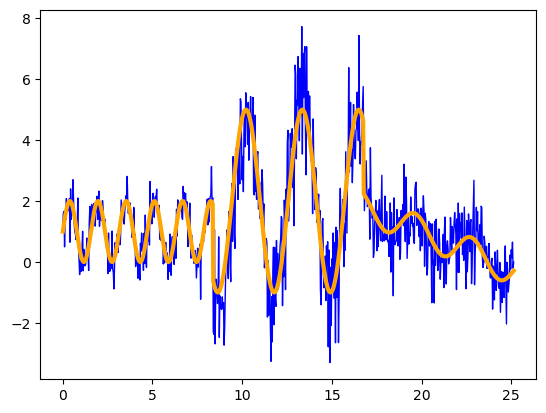

In [95]:
def generate_spatially_inhomogenous_data():

    # generate data
    n = 250

    x = np.zeros( 3 * n)

        # generate time
    t = np.linspace(0, 8*np.pi, 3 * n)
    t1=t[0:n]
    t2=t[n:2*n]
    t3=t[2*n:3*n]

    # generate spatially inhomogenous data
    x[0:n] = np.sin(4*t1) + np.random.normal(0, 0.5, n)+1
    x[n:2*n] = 3*np.sin(2*t2) + np.random.normal(0, 1.25, n)+2
    x[2*n:3*n] = 0.5*np.sin(2*t3) + np.random.normal(0, 0.7, n)-0.25*t3+6

    true_fun=np.concatenate([np.sin(4*t1)+1,3*np.sin(2*t2)+2,0.5*np.sin(2*t3)-0.25*t3+6])



    return x, t, true_fun
    

x,t,true_fun=generate_spatially_inhomogenous_data()

plt.plot(t,x,color='blue',lw=1)
plt.plot(t,true_fun,color='orange',lw=3)

x=x.reshape(-1,1)
x


### Piecewise Linear Comparison

In [96]:
D=Difference_Matrix(len(t), 1)

best_lambda=cross_validation(x,D,5,3)

Performing  0 out of 3 iterations of cross validation
Performing cross validation for lambda = 2.288092883865017
Performing cross validation for lambda = 22.88092883865017
Performing cross validation for lambda = 228.8092883865017
Performing cross validation for lambda = 2288.092883865017
Performing cross validation for lambda = 22880.92883865017
Performing  1 out of 3 iterations of cross validation
Performing cross validation for lambda = 2.25990098784369
Performing cross validation for lambda = 22.599009878436895
Performing cross validation for lambda = 225.99009878436897
Performing cross validation for lambda = 2259.9009878436896
Performing cross validation for lambda = 22599.009878436897
No solution found for lambda = 22599.009878436897
Status: maxiter exceeded
Performing  2 out of 3 iterations of cross validation
Performing cross validation for lambda = 2.176118048717043
Performing cross validation for lambda = 21.76118048717043
Performing cross validation for lambda = 217.6118048

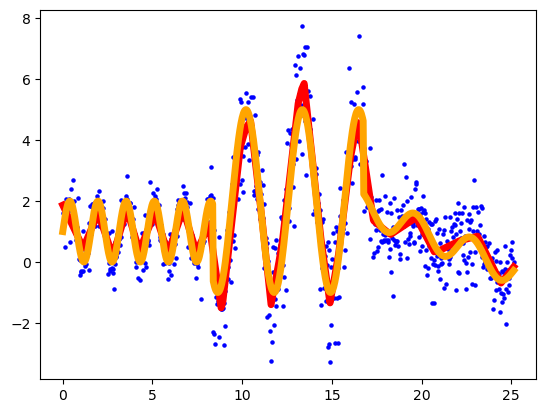

In [97]:
results=adaptive_tf(x,D,best_lambda)

sol=results['sol'].x.reshape(-1,1)

plt.plot(t,sol,label='solution',color='red',lw=5)
plt.scatter(t,x,label='data',color='blue',s=5)
plt.plot(t,true_fun,label='true function',color='orange',lw=5)


In [98]:
compute_error(true_fun,sol.flatten())

0.14500858934676136

In [143]:
prior=np.concatenate((0.005*np.ones(250),np.ones(250),np.ones(250)))

D=Difference_Matrix(len(t), 1,prior=prior)

In [144]:
best_lambda=cross_validation(x,D,5,3)

Performing  0 out of 3 iterations of cross validation
Performing cross validation for lambda = 184.4996179255239
Performing cross validation for lambda = 1844.9961792552388
Performing cross validation for lambda = 18449.96179255239
Performing cross validation for lambda = 184499.6179255239
Performing cross validation for lambda = 1844996.1792552387
No solution found for lambda = 1844996.1792552387
Status: maxiter exceeded
Performing  1 out of 3 iterations of cross validation
Performing cross validation for lambda = 186.01090371871035
Performing cross validation for lambda = 1860.1090371871035
Performing cross validation for lambda = 18601.090371871036
Performing cross validation for lambda = 186010.90371871035
Performing cross validation for lambda = 1860109.0371871034
Performing  2 out of 3 iterations of cross validation
Performing cross validation for lambda = 192.50659588424824
Performing cross validation for lambda = 1925.0659588424821
Performing cross validation for lambda = 19250

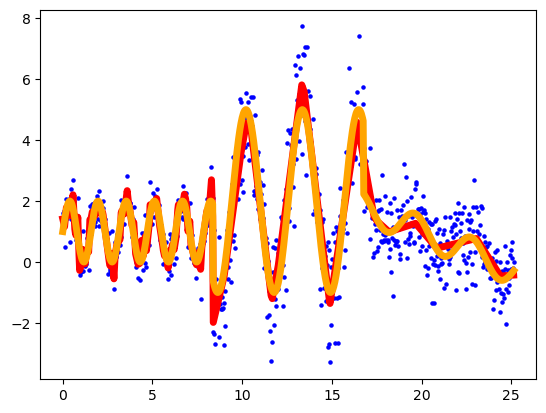

In [151]:
results=adaptive_tf(x,D,50)

sol=results['sol'].x.reshape(-1,1)

plt.plot(t,sol,label='solution',color='red',lw=5)
plt.scatter(t,x,label='data',color='blue',s=5)
plt.plot(t,true_fun,label='true function',color='orange',lw=5)


In [153]:
compute_error(true_fun,sol.flatten())

0.12512156236449887

### Second Order Comparison

In [103]:
D=Difference_Matrix(len(t), 2)

best_lambda=cross_validation(x,D,5,3)

Performing  0 out of 3 iterations of cross validation
Performing cross validation for lambda = 93.02671295521874
Performing cross validation for lambda = 930.2671295521874
Performing cross validation for lambda = 9302.671295521874
No solution found for lambda = 9302.671295521874
Status: maxiter exceeded
Performing cross validation for lambda = 93026.71295521874
No solution found for lambda = 93026.71295521874
Status: maxiter exceeded
Performing cross validation for lambda = 930267.1295521874
No solution found for lambda = 930267.1295521874
Status: maxiter exceeded
Performing  1 out of 3 iterations of cross validation
Performing cross validation for lambda = 91.8530535725771
Performing cross validation for lambda = 918.5305357257708
Performing cross validation for lambda = 9185.305357257708
No solution found for lambda = 9185.305357257708
Status: maxiter exceeded
Performing cross validation for lambda = 91853.05357257709
No solution found for lambda = 91853.05357257709
Status: maxiter e

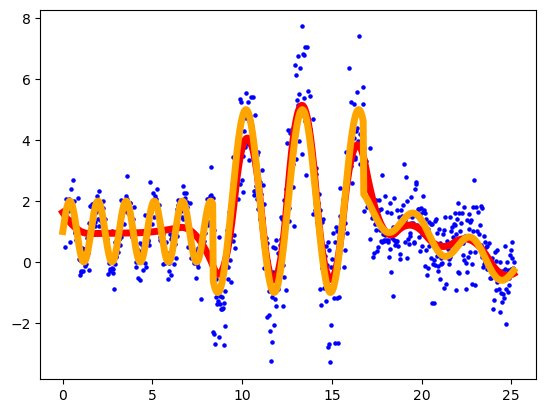

In [104]:
results=adaptive_tf(x,D,best_lambda)

sol=results['sol'].x.reshape(-1,1)

plt.plot(t,sol,label='solution',color='red',lw=5)
plt.scatter(t,x,label='data',color='blue',s=5)
plt.plot(t,true_fun,label='true function',color='orange',lw=5)


In [105]:
compute_error(true_fun,sol.flatten())

0.3125043405871575

### Algorithm for Inference

Idea
- Use Kernel to Smooth out Variance
- Apply Piecewise Constant TF on this smoothed volatility

- Use estimates in prior model

In [106]:
local_var=LocalVariance(t,x,0,0.25)
local_var_series=local_var.fit()


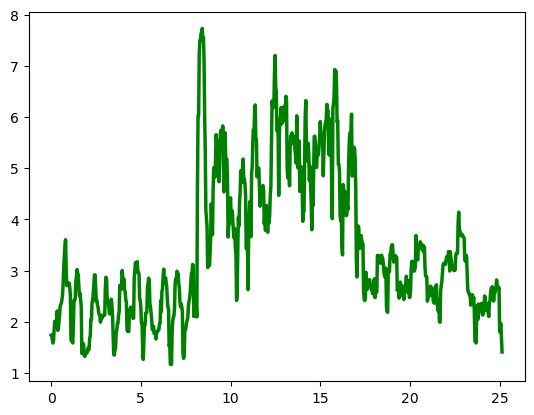

In [107]:
fig, ax = plt.subplots()
ax.plot(t, 4*local_var_series, color="green", label="Local Variance", lw=2.5)  # plots prior


In [108]:
local_var.optimal_bandwidth

0.25

### Apply Piecewise Constant TF on this smoothed volatility

In [109]:
D=Difference_Matrix(len(t), 0)

best_lambda=cross_validation(local_var_series.reshape(-1,1),D,10,5)


Performing  0 out of 5 iterations of cross validation
Performing cross validation for lambda = 0.006539230053819166
Performing cross validation for lambda = 0.01819579606944993
Performing cross validation for lambda = 0.05063088343369132
Performing cross validation for lambda = 0.14088344074047063
Performing cross validation for lambda = 0.39201654264768704
Performing cross validation for lambda = 1.0908093165650523
Performing cross validation for lambda = 3.0352417198232122
Performing cross validation for lambda = 8.445740385465397
Performing cross validation for lambda = 23.50077431817718
Performing cross validation for lambda = 65.39230053819166
Performing  1 out of 5 iterations of cross validation
Performing cross validation for lambda = 0.006366852983033839
Performing cross validation for lambda = 0.017716146630411295
Performing cross validation for lambda = 0.04929623037733099
Performing cross validation for lambda = 0.13716968932981072
Performing cross validation for lambda = 0.

In [110]:
results=adaptive_tf(local_var_series.reshape(-1,1),D,25)


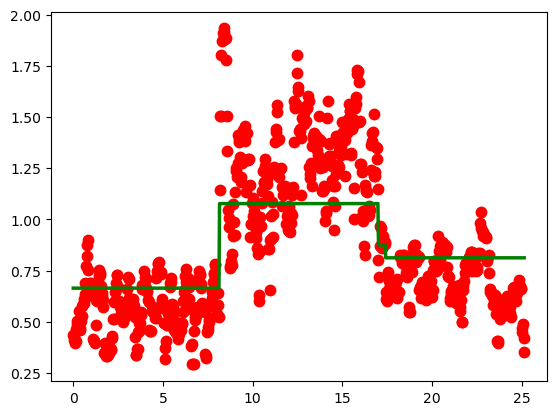

In [111]:
fig, ax = plt.subplots()
ax.plot(t, results['sol'].x, color="green", label="Local Variance", lw=2.5)  # plots prior
ax.scatter(t, local_var_series, color="red", label="Data", lw=2.5)  # plots prior

In [112]:
def extract_sol(x:np.ndarray):
    x=np.round(x,1)

    x=np.unique(x)




    return x

extract_sol(results['sol'].x)

array([0.7, 0.8, 0.9, 1.1])

In [126]:
prior=np.concatenate((0.05*np.ones(250),np.ones(250),np.ones(250)))

D=Difference_Matrix(len(t), 2,prior=prior)

D.D

 WARNING Condition number is large: 100675417.15258314


array([[ 0.05, -0.15,  0.15, ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.05, -0.15, ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.05, ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ..., -1.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  3.  , -1.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ..., -3.  ,  3.  , -1.  ]])

In [127]:
best_lambda=cross_validation(x,D,5,3)

Performing  0 out of 3 iterations of cross validation
Performing cross validation for lambda = 1401.142585539888
Performing cross validation for lambda = 14011.425855398878
No solution found for lambda = 14011.425855398878
Status: maxiter exceeded
Performing cross validation for lambda = 140114.2585539888
No solution found for lambda = 140114.2585539888
Status: maxiter exceeded
Performing cross validation for lambda = 1401142.585539888
No solution found for lambda = 1401142.585539888
Status: maxiter exceeded
Performing cross validation for lambda = 14011425.855398878
No solution found for lambda = 14011425.855398878
Status: maxiter exceeded
Performing  1 out of 3 iterations of cross validation
Performing cross validation for lambda = 1879.408865111027
Performing cross validation for lambda = 18794.08865111027
No solution found for lambda = 18794.08865111027
Status: maxiter exceeded
Performing cross validation for lambda = 187940.8865111027
No solution found for lambda = 187940.88651110

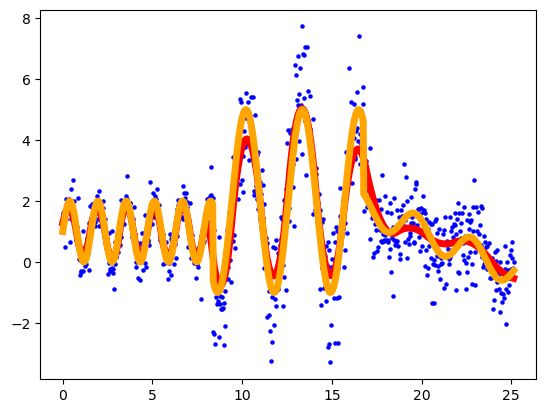

In [128]:
results=adaptive_tf(x,D,best_lambda)

sol=results['sol'].x.reshape(-1,1)

plt.plot(t,sol,label='solution',color='red',lw=5)
plt.scatter(t,x,label='data',color='blue',s=5)
plt.plot(t,true_fun,label='true function',color='orange',lw=5)


In [129]:
compute_error(true_fun,sol.flatten())

0.1661321517146045